In [1]:
%pylab inline
import tensorflow as tf
#from src.setup.config import db
from itertools import groupby
import pandas as pd
from collections import OrderedDict
from datetime import date
import pyodbc
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vivi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
Data = pd.read_csv('MasernAndCoords.csv',encoding='latin-1')
Data

,Unnamed: 0,week,year,countyx,count,incidence,index,BinX,BinY,Unnamed: 0.1,X,Y,county
0,0,1,2001,LK Cham,1.0,29.529012,0,12.0,4.0,159.0,12.672938,49.224303,LK Cham
1,1,1,2001,LK Main-Taunus-Kreis,1.0,16.459852,1,4.0,6.0,187.0,8.431752,50.113092,LK Main-Taunus-Kreis
2,2,1,2001,LK Marburg-Biedenkopf,1.0,15.782552,2,5.0,7.0,57.0,8.742194,50.840613,LK Marburg-Biedenkopf
3,3,1,2001,LK Saale-Orla-Kreis,2.0,94.775932,3,10.0,7.0,378.0,11.712125,50.585463,LK Saale-Orla-Kreis
4,4,1,2001,LK Segeberg,1.0,14.976038,4,7.0,13.0,135.0,10.160411,53.904668,LK Segeberg
5,5,1,2001,SK Darmstadt,1.0,16.475219,5,5.0,5.0,322.0,8.666565,49.889684,SK Darmstadt
6,6,1,2001,SK Düsseldorf,2.0,8.411475,6,2.0,8.0,323.0,6.825464,51.235562,SK Düsseldorf
7,7,2,2001,LK Cham,3.0,110.391703,7,12.0,4.0,159.0,12.672938,49.224303,LK Cham
8,8,2,2001,LK Darmstadt-Dieburg,1.0,12.926391,8,5.0,5.0,366.0,8.757112,49.858567,LK Darmstadt-Dieburg
9,9,2,2001,LK Karlsruhe,1.0,6.690355,9,5.0,3.0,168.0,8.548759,49.036669,LK Karlsruhe


In [5]:
allMaps = []
for m in range(15):
    for n in range(51):
        year = 2001+m
        thisweek = Data[Data['year']==year][Data[Data['year']==year]['week']==n]
        thisweek = thisweek.reset_index(drop=True)
        currentMap = np.zeros((16,16))
        for i in range(shape(thisweek)[0]):
            inc = thisweek['incidence'][i]
            x = int(thisweek['BinX'][i])
            y = int(thisweek['BinY'][i])
            currentMap[x][y]=inc
        allMaps.append(currentMap)
    #plt.imshow(currentMap, cmap='hot', interpolation='nearest',animated=True)
    #plt.show()

In [7]:
shape(allMaps)

(765, 16, 16)

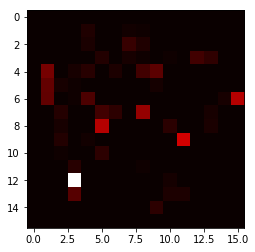

In [10]:
plt.imshow(allMaps[10], cmap='hot', interpolation='nearest',animated=True)
plt.show()